## What is the minimun number of die rolls needed to win the game "Snakes and Ladders"?

### To find out, let's simulate the game.

First we create a board, a die, and players who can move and "land" in the board, and (maybe) win the game.

In [1]:
import random
import datetime
import pandas as pd
import numpy as np

class Board():
    """A class representing the game's board."""
    def __init__(self):
        """Create the board."""
        self.ladders = {1: 38, 4: 14, 9: 31, 21: 42, 28: 84, 36: 44, 51: 67, 71: 91, 80:100}
        self.snakes = {16: 6, 48: 30, 64: 60, 79: 19, 93: 68, 95: 24, 97: 76, 98: 78}
        self.squares = {num: 'empty' for num in range(1, 101)}
    
    def update_board(self, player_position, player_name, player_prev_position):
        """Returns the updated board after each move."""
        self.squares[player_position] = player_name
        self.squares[player_prev_position] = 'empty'
        
class Die():
    """A class representing a single D6 die."""
    def __init__(self):
        self.num_sides = 6

    def roll(self):
        """Return a random value between 1 and num_sides."""
        return random.randint(1, self.num_sides)

class Player(Die):
    """A class representing a player."""
    def __init__(self, name):
        super().__init__()
        self.name = name
        self.position = 0
        self.all_positions = [0]
  
    def move(self, die_roll):
        """ (int) -> int
        Return the new position of player after rolling the die."""
        self.position += die_roll
        return self.position
    
    def landing(self, current_square, board):
        """ (self.position, Board object) -> self.position
        Evaluate the board and return where the player 'lands'."""
        if current_square > 100:
            n = current_square - 100
            self.position = 100 - n
            current_square = self.position
                    
        if current_square in board.ladders.keys():
            self.position = board.ladders[current_square]
        elif current_square in board.snakes.keys():
            self.position = board.snakes[current_square]
        
        if board.squares[current_square] != 'empty':
            self.position = 0
        
        self.all_positions.append(self.position)


    def win(self):
        """Return True if Player has reached the 100th square of the board."""
        if self.position == 100:
            return True

Then we need to define functions to play the game and to run as many simulations as we want:

In [2]:
def play_game(players):
    """
    (dict) -> stats
    Runs a simulation of one game.
    Returns the winner's name and the number of times she had to roll the die to win.
    """
    board = Board()
    counter = 0
    
    while board.squares[100] == 'empty':
        counter += 1
        for player in players.keys():
            current_square = players[player].move(players[player].roll())
            players[player].landing(current_square, board)
            player_position = players[player].position
            player_name = players[player].name
            player_prev_position = players[player].all_positions[-1]
            board.update_board(player_position, player_name, player_prev_position)
            if players[player].win():
                board.squares[100] = players[player].name
                break

    return players[player].name, counter

def play_simulations(players, num_of_simul):
    """
    (dict, int) -> dict
    k:v -> 'Player n':[list of die roll counts]   
    Returns a dictionary with the result of num_of_simul simulations for players.
    """
    results = {}
    
    for player in players:
        results[players[player].name] = []
    
    for n in range(num_of_simul):
        result = play_game(players)
        results[result[0]].append(result[1])
        # reset player's position attributes before next game
        for player in players:
            players[player].position = 0
            players[player].all_positions = []
    
    return results

Now we are ready to simulate the games. The game will be played by 1, 2, 3, or 4 players, and we will run 100, 1000 and 10000 simulations for each case.

In [3]:
### Game simulation starts here:
start = datetime.datetime.now()

# Create players
players_4 = {1: Player('Player 1'), 2: Player('Player 2'), 3: Player('Player 3'), 4: Player('Player 4')}
players_3 = {key:players_4[key] for key in [1, 2, 3]}
players_2 = {key:players_4[key] for key in [1, 2]}
player_1 = {key:players_4[key] for key in [1]}

# create a list of 1, 2, 3, and 4 players to iterate over:
playing = [player_1, players_2, players_3, players_4]

all_results = []

for n in range(len(playing)):
    all_results.append(play_simulations(playing[n], 100))     
    all_results.append(play_simulations(playing[n], 1000))      
    all_results.append(play_simulations(playing[n], 10000))

end = datetime.datetime.now()
runtime = (end - start).seconds
print("runtime: ", runtime, "seconds.")

runtime:  16 seconds.


#### Now, let's take a look at the results.
We start by creating dataframes for each case (1, 2, 3, or 4 players). To compare the results of the different simulations, we'll use the `pd.df.describe()` method.

In [4]:
# Create a df with the data for 1 player, and get the summary for each simulation:
d = dict(g1_p1_100 = np.array(all_results[0]['Player 1']),
         g1_p1_1000 = np.array(all_results[1]['Player 1']),
         g1_p1_10000 = np.array(all_results[2]['Player 1']))

results_g1 = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in d.items()]))
summary_g1 = results_g1.describe().round(1)
summary_g1  # type(summary_g1) # pandas.core.frame.DataFrame

,g1_p1_100,g1_p1_1000,g1_p1_10000
count,100.0,1000.0,10000.0
mean,49.4,48.9,49.6
std,37.1,35.9,38.6
min,7.0,8.0,7.0
25%,22.8,24.0,23.0
50%,40.5,39.0,38.0
75%,63.0,63.2,64.0
max,226.0,268.0,363.0


### WORK IN PROGRESS...
From this statistics summary we can see that the minimun number of die rolls to win the game is 7.<br>
Does one of the players have more chances of winning than the others? Is it better to play as Player 1, or 2, ... or is it totally random? Does the player order affect the outcome of the game?
Let's check the min values XXXXXXXXXXXX

In [5]:
# Create a df with the data for 2 players, and get the summary for each simulation:
d = dict(g2_p1_100 = np.array(all_results[3]['Player 1']),
         g2_p1_1000 = np.array(all_results[4]['Player 1']),
         g2_p1_10000 = np.array(all_results[5]['Player 1']),
         g2_p2_100 = np.array(all_results[3]['Player 2']),
         g2_p2_1000 = np.array(all_results[4]['Player 2']),
         g2_p2_10000 = np.array(all_results[5]['Player 2']))

results_g2 = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in d.items()]))
summary_g2 = results_g2.describe().round(1)
# summary_g2
summary_g2.loc['min']

g2_p1_100      9.0
g2_p1_1000     7.0
g2_p1_10000    7.0
g2_p2_100      9.0
g2_p2_1000     7.0
g2_p2_10000    7.0
Name: min, dtype: float64

In [6]:
# Create a df with the data for 3 players, and get the summary for each simulation:
d = dict(g3_p1_100 = np.array(all_results[6]['Player 1']),
         g3_p1_1000 = np.array(all_results[7]['Player 1']),
         g3_p1_10000 = np.array(all_results[8]['Player 1']),
         g3_p2_100 = np.array(all_results[6]['Player 2']),
         g3_p2_1000 = np.array(all_results[7]['Player 2']),
         g3_p2_10000 = np.array(all_results[8]['Player 2']),
         g3_p3_100 = np.array(all_results[6]['Player 3']),
         g3_p3_1000 = np.array(all_results[7]['Player 3']),
         g3_p3_10000 = np.array(all_results[8]['Player 3']))

results_g3 = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in d.items()]))
summary_g3 = results_g3.describe()
# summary_g3
summary_g3.loc['min']

g3_p1_100       8.0
g3_p1_1000      7.0
g3_p1_10000     7.0
g3_p2_100       8.0
g3_p2_1000      7.0
g3_p2_10000     7.0
g3_p3_100      10.0
g3_p3_1000      7.0
g3_p3_10000     7.0
Name: min, dtype: float64

In [7]:
# Create a df with the data for 4 players, and get the summary for each simulation:
d = dict(g4_p1_100 = np.array(all_results[9]['Player 1']),
         g4_p1_1000 = np.array(all_results[10]['Player 1']),
         g4_p1_10000 = np.array(all_results[11]['Player 1']),
         g4_p2_100 = np.array(all_results[9]['Player 2']),
         g4_p2_1000 = np.array(all_results[10]['Player 2']),
         g4_p2_10000 = np.array(all_results[11]['Player 2']),
         g4_p3_100 = np.array(all_results[9]['Player 3']),
         g4_p3_1000 = np.array(all_results[10]['Player 3']),
         g4_p3_10000 = np.array(all_results[11]['Player 3']),
         g4_p4_100 = np.array(all_results[9]['Player 4']),
         g4_p4_1000 = np.array(all_results[10]['Player 4']),
         g4_p4_10000 = np.array(all_results[11]['Player 4']))

results_g4 = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in d.items()]))
summary_g4 = results_g4.describe().round(1)
# summary_g4
summary_g4.loc['min']

g4_p1_100       8.0
g4_p1_1000      7.0
g4_p1_10000     7.0
g4_p2_100       8.0
g4_p2_1000      7.0
g4_p2_10000     7.0
g4_p3_100      10.0
g4_p3_1000      8.0
g4_p3_10000     7.0
g4_p4_100       8.0
g4_p4_1000      7.0
g4_p4_10000     7.0
Name: min, dtype: float64

To compare among all simulations, we extract the median values for each game:

In [8]:
# I extract all median values from the all the summaries:
g1_p1 = summary_g1.loc['50%']
g2_p1 = summary_g2.loc['50%'][:3]   ### type(g2_p1) # pandas.core.series.Series
g2_p2 = summary_g2.loc['50%'][3:]
g3_p1 = summary_g3.loc['50%'][:3]
g3_p2 = summary_g3.loc['50%'][3:6]
g3_p3 = summary_g3.loc['50%'][6:]
g4_p1 = summary_g4.loc['50%'][:3]
g4_p2 = summary_g4.loc['50%'][3:6]
g4_p3 = summary_g4.loc['50%'][6:9]
g4_p4 = summary_g4.loc['50%'][9:]

# Transpose all Series and rename columns to '100', '1000' and '10000':
g1p1 = pd.DataFrame(g1_p1).transpose().rename(columns={'g1_p1_100':'100', 'g1_p1_1000':'1000', 'g1_p1_10000':'10000'})

g2p1 = pd.DataFrame(g2_p1).transpose().rename(columns={'g2_p1_100':'100', 'g2_p1_1000':'1000', 'g2_p1_10000':'10000'})
g2p2 = pd.DataFrame(g2_p2).transpose().rename(columns={'g2_p2_100':'100', 'g2_p2_1000':'1000', 'g2_p2_10000':'10000'})

g3p1 = pd.DataFrame(g3_p1).transpose().rename(columns={'g3_p1_100':'100', 'g3_p1_1000':'1000', 'g3_p1_10000':'10000'})
g3p2 = pd.DataFrame(g3_p2).transpose().rename(columns={'g3_p2_100':'100', 'g3_p2_1000':'1000', 'g3_p2_10000':'10000'})
g3p3 = pd.DataFrame(g3_p3).transpose().rename(columns={'g3_p3_100':'100', 'g3_p3_1000':'1000', 'g3_p3_10000':'10000'})

g4p1 = pd.DataFrame(g4_p1).transpose().rename(columns={'g4_p1_100':'100', 'g4_p1_1000':'1000', 'g4_p1_10000':'10000'})
g4p2 = pd.DataFrame(g4_p2).transpose().rename(columns={'g4_p2_100':'100', 'g4_p2_1000':'1000', 'g4_p2_10000':'10000'})
g4p3 = pd.DataFrame(g4_p3).transpose().rename(columns={'g4_p3_100':'100', 'g4_p3_1000':'1000', 'g4_p3_10000':'10000'})
g4p4 = pd.DataFrame(g4_p4).transpose().rename(columns={'g4_p4_100':'100', 'g4_p4_1000':'1000', 'g4_p4_10000':'10000'})

# Create median_values_df:
frames = [g1p1, g2p1, g2p2, g3p1, g3p2, g3p3, g4p1, g4p2, g4p3, g4p4]
median_values_df = pd.concat(frames)

# Rename index:
games = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
players = ['Player 1', 'Player 1', 'Player 2', 'Player 1', 'Player 2', 'Player 3', 'Player 1', 'Player 2', 'Player 3', 'Player 4']
median_values_df.set_index([games, players])

100  1000  10000
1 Player 1  40.5  39.0   38.0
2 Player 1  26.5  24.0   24.0
  Player 2  23.5  26.0   24.0
3 Player 1  20.0  21.0   21.0
  Player 2  21.5  21.0   21.0
  Player 3  24.0  21.0   21.0
4 Player 1  21.0  19.0   18.0
  Player 2  20.0  18.0   18.0
  Player 3  17.0  19.0   18.0
  Player 4  18.0  18.0   18.0

## Plot results

[Text(0, 0, '100'), Text(2, 0, '1000'), Text(4, 0, '10000')]

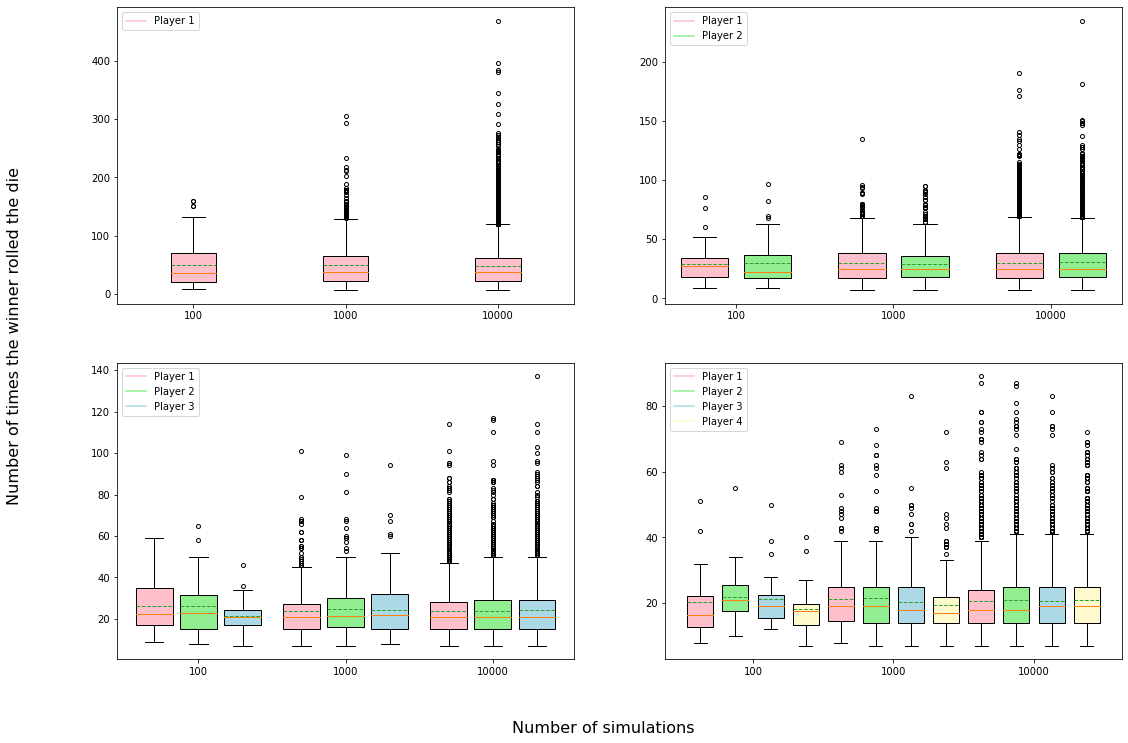

In [60]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 12)) # sharex=True, sharey=True, 
ax1, ax2, ax3, ax4 = ax.flatten()

### Set common labels

fig.text(0.5, 0.04, 'Number of simulations', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'Number of times the winner rolled the die', va='center', rotation='vertical', fontsize=16)

########################################
# Plot ax1

### extract data from all_results - 1 player, all simulations:
s_100 = [x for x in all_results[0].values()]   # this creates nested lists
s_1000 = [x for x in all_results[1].values()]
s_10000 = [x for x in all_results[2].values()]
s_100 = s_100[0]     # get inner lists
s_1000 = s_1000[0]
s_10000 = s_10000[0]
g1_p1 = {}           # create dictionary to pass data to the plot function
g1_p1[100] = s_100
g1_p1[1000] = s_1000
g1_p1[10000] = s_10000

flierprops = dict(marker='o', markersize=4)
bplot = ax1.boxplot(g1_p1.values(), flierprops=flierprops, showmeans=True, meanline=True, patch_artist=True)
# ax1.set_title("Game results for 1 player")

### add color
plt.setp(bplot["boxes"], facecolor='pink')

### add ticks and labels
# ax1.set_xlabel("Number of simulations")
# ax1.set_ylabel("Number of times the winner rolled the die")
ax1.set_xticklabels(g1_p1.keys())#, rotation=30, fontsize=10)

### add legend
ax1.plot([], c='pink', label='Player 1')
ax1.legend()

########################################
# Plot ax2

# create lists to hold data to plot, for 2 players games
g2_p1_data = []
g2_p2_data = []
# add data for Player 1
s_100 = [x for x in all_results[3]['Player 1']]
s_1000 = [x for x in all_results[4]['Player 1']]
s_10000 = [x for x in all_results[5]['Player 1']]
g2_p1_data.append(s_100)
g2_p1_data.append(s_1000)
g2_p1_data.append(s_10000)
# add data for Player 2
s_100 = [x for x in all_results[3]['Player 2']]
s_1000 = [x for x in all_results[4]['Player 2']]
s_10000 = [x for x in all_results[5]['Player 2']]
g2_p2_data.append(s_100)
g2_p2_data.append(s_1000)
g2_p2_data.append(s_10000)

                            # def set_box_color(bp, color):
                            #     plt.setp(bp['boxes'], color=color)
                            #     plt.setp(bp['whiskers'], color=color)
                            #     plt.setp(bp['caps'], color=color)
                            #     plt.setp(bp['medians'], color=color)

### create boxplots
flierprops = dict(marker='o', markersize=4)

g2_p1 = ax2.boxplot(g2_p1_data, 
                    positions=np.array(range(len(g2_p1_data)))*2.0-0.4, widths=0.6, patch_artist=True,
                    flierprops=flierprops, showmeans=True, meanline=True,)
g2_p2 = ax2.boxplot(g2_p2_data, 
                    positions=np.array(range(len(g2_p2_data)))*2.0+0.4, widths=0.6, patch_artist=True,
                    flierprops=flierprops, showmeans=True, meanline=True)

### add color
plt.setp(g2_p1["boxes"], facecolor='pink')
plt.setp(g2_p2["boxes"], facecolor='lightgreen')

### add legend
ax2.plot([], c='pink', label='Player 1')
ax2.plot([], c='lightgreen', label='Player 2')
ax2.legend()

### add ticks and labels
labels = ['100', '1000', '10000']
ticks = [0, 2, 4]
# ax2.set_xlabel("Number of simulations")
# ax2.set_ylabel("Number of times the winner rolled the die")
ax2.set_xticks(ticks, minor=False)
ax2.set_xticklabels(labels, fontdict=None, minor=False)

########################################
# Plot ax3

# create lists to hold data to plot, for 3 players games
g3_p1_data = []
g3_p2_data = []
g3_p3_data = []
# add data for Player 1
s_100 = [x for x in all_results[6]['Player 1']]
s_1000 = [x for x in all_results[7]['Player 1']]
s_10000 = [x for x in all_results[8]['Player 1']]
g3_p1_data.append(s_100)
g3_p1_data.append(s_1000)
g3_p1_data.append(s_10000)
# add data for Player 2
s_100 = [x for x in all_results[6]['Player 2']]
s_1000 = [x for x in all_results[7]['Player 2']]
s_10000 = [x for x in all_results[8]['Player 2']]
g3_p2_data.append(s_100)
g3_p2_data.append(s_1000)
g3_p2_data.append(s_10000)
# add data for Player 3
s_100 = [x for x in all_results[6]['Player 3']]
s_1000 = [x for x in all_results[7]['Player 3']]
s_10000 = [x for x in all_results[8]['Player 3']]
g3_p3_data.append(s_100)
g3_p3_data.append(s_1000)
g3_p3_data.append(s_10000)



                            # def set_box_color(bp, color):
                            #     plt.setp(bp['boxes'], color=color)
                            #     plt.setp(bp['whiskers'], color=color)
                            #     plt.setp(bp['caps'], color=color)
                            #     plt.setp(bp['medians'], color=color)

### create boxplots
flierprops = dict(marker='o', markersize=4)

g3_p1 = ax3.boxplot(g3_p1_data,
                    positions=np.array(range(len(g3_p1_data)))*2.0-0.6, widths=0.5, patch_artist=True,
                    flierprops=flierprops, showmeans=True, meanline=True,)
g3_p2 = ax3.boxplot(g3_p2_data, 
                    positions=np.array(range(len(g3_p2_data)))*2.0, widths=0.5, patch_artist=True,
                    flierprops=flierprops, showmeans=True, meanline=True)
g3_p3 = ax3.boxplot(g3_p3_data, 
                    positions=np.array(range(len(g3_p3_data)))*2.0+0.6, widths=0.5, patch_artist=True,
                    flierprops=flierprops, showmeans=True, meanline=True)

# for flier in ax2['fliers']:
#     flier.set(marker='o', color='#e7298a', alpha=0.5)

# set_box_color(g2_p1, 'pink')
# set_box_color(g2_p2, 'lightgreen')

### add color
plt.setp(g3_p1["boxes"], facecolor='pink')
plt.setp(g3_p2["boxes"], facecolor='lightgreen')
plt.setp(g3_p3["boxes"], facecolor='lightblue')

### add legend
ax3.plot([], c='pink', label='Player 1')
ax3.plot([], c='lightgreen', label='Player 2')
ax3.plot([], c='lightblue', label='Player 3')
ax3.legend()

### add ticks and labels
labels = ['100', '1000', '10000']
ticks = [0, 2, 4]
# ax3.set_xlabel("Number of simulations")
# ax3.set_ylabel("Number of times the winner rolled the die")
ax3.set_xticks(ticks, minor=False)
ax3.set_xticklabels(labels, fontdict=None, minor=False)

########################################
# Plot ax4

# create lists to hold data to plot, for 4 players games
g4_p1_data = []
g4_p2_data = []
g4_p3_data = []
g4_p4_data = []

# add data for Player 1
s_100 = [x for x in all_results[9]['Player 1']]
s_1000 = [x for x in all_results[10]['Player 1']]
s_10000 = [x for x in all_results[11]['Player 1']]
g4_p1_data.append(s_100)
g4_p1_data.append(s_1000)
g4_p1_data.append(s_10000)
# add data for Player 2
s_100 = [x for x in all_results[9]['Player 2']]
s_1000 = [x for x in all_results[10]['Player 2']]
s_10000 = [x for x in all_results[11]['Player 2']]
g4_p2_data.append(s_100)
g4_p2_data.append(s_1000)
g4_p2_data.append(s_10000)
# add data for Player 3
s_100 = [x for x in all_results[9]['Player 3']]
s_1000 = [x for x in all_results[10]['Player 3']]
s_10000 = [x for x in all_results[11]['Player 3']]
g4_p3_data.append(s_100)
g4_p3_data.append(s_1000)
g4_p3_data.append(s_10000)
# add data for Player 4
s_100 = [x for x in all_results[9]['Player 4']]
s_1000 = [x for x in all_results[10]['Player 4']]
s_10000 = [x for x in all_results[11]['Player 4']]
g4_p4_data.append(s_100)
g4_p4_data.append(s_1000)
g4_p4_data.append(s_10000)


                            # def set_box_color(bp, color):
                            #     plt.setp(bp['boxes'], color=color)
                            #     plt.setp(bp['whiskers'], color=color)
                            #     plt.setp(bp['caps'], color=color)
                            #     plt.setp(bp['medians'], color=color)

### create boxplots
flierprops = dict(marker='o', markersize=4)

g4_p1 = ax4.boxplot(g4_p1_data,
                    positions=np.array(range(len(g4_p1_data)))*2.0-0.75, widths=0.37, patch_artist=True,
                    flierprops=flierprops, showmeans=True, meanline=True,)
g4_p2 = ax4.boxplot(g4_p2_data, 
                    positions=np.array(range(len(g4_p2_data)))*2.0-0.25, widths=0.37, patch_artist=True,
                    flierprops=flierprops, showmeans=True, meanline=True)
g4_p3 = ax4.boxplot(g4_p3_data, 
                    positions=np.array(range(len(g4_p3_data)))*2.0+0.25, widths=0.37, patch_artist=True,
                    flierprops=flierprops, showmeans=True, meanline=True)
g4_p4 = ax4.boxplot(g4_p4_data, 
                    positions=np.array(range(len(g4_p4_data)))*2.0+0.75, widths=0.37, patch_artist=True,
                    flierprops=flierprops, showmeans=True, meanline=True)

# for flier in ax2['fliers']:
#     flier.set(marker='o', color='#e7298a', alpha=0.5)

# set_box_color(g2_p1, 'pink')
# set_box_color(g2_p2, 'lightgreen')

### add color
plt.setp(g4_p1["boxes"], facecolor='pink')
plt.setp(g4_p2["boxes"], facecolor='lightgreen')
plt.setp(g4_p3["boxes"], facecolor='lightblue')
plt.setp(g4_p4["boxes"], facecolor='lemonchiffon')

### add legend
ax4.plot([], c='pink', label='Player 1')
ax4.plot([], c='lightgreen', label='Player 2')
ax4.plot([], c='lightblue', label='Player 3')
ax4.plot([], c='lemonchiffon', label='Player 4')
ax4.legend()

### add ticks and labels
labels = ['100', '1000', '10000']
ticks = [0, 2, 4]
# ax4.set_xlabel("Number of simulations")
# ax4.set_ylabel("Number of times the winner rolled the die")
ax4.set_xticks(ticks, minor=False)
ax4.set_xticklabels(labels, fontdict=None, minor=False)

Add conclusion...